### Importing Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#### separate the features and target columnn.

In [111]:
dataset = pd.read_csv("processed table.csv")
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset = pd.DataFrame(dataset)
y = dataset["Attrition"]
x = dataset.drop("Attrition",axis=1)

### Splitting data into train & test set

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [117]:
x_train.shape

(1176, 31)

In [118]:
x_test.shape

(294, 31)

In [119]:
y_train.shape

(1176,)

In [120]:
y_test.shape

(294,)

### Logistic Regression

In [122]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [123]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(x_train,y_train)
    prediction=a.predict(x_train)
    y_pred=a.predict(x_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.861395
[Logistic Regression] test data accuracy is : 0.877551
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.778912
[KNN] training data accuracy is : 0.885204
[KNN] test data accuracy is : 0.812925


[SVM] training data accuracy is : 0.852891
[SVM] test data accuracy is : 0.867347
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.877551
[Naive Bayes] training data accuracy is : 0.813776
[Naive Bayes] test data accuracy is : 0.840136


In [86]:
model_scores={'Logistic Regression':lr.score(x_test,y_test),
             'KNN classifier':knn.score(x_test,y_test),
             'Support Vector Machine':svm.score(x_test,y_test),
             'Random forest':rm.score(x_test,y_test),
              'Decision tree':dt.score(x_test,y_test),
              'Naive Bayes':gnb.score(x_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8775510204081632,
 'KNN classifier': 0.8129251700680272,
 'Support Vector Machine': 0.8673469387755102,
 'Random forest': 0.8809523809523809,
 'Decision tree': 0.7857142857142857,
 'Naive Bayes': 0.8401360544217688}

### Classification from Logistic Regression

In [124]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(x_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294



### Classification from Random Forest

In [125]:

from sklearn.metrics import classification_report

rm_y_preds = rm.predict(x_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



#### Model Comparison

In [126]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.877551,0.812925,0.867347,0.880952,0.785714,0.840136


<AxesSubplot:>

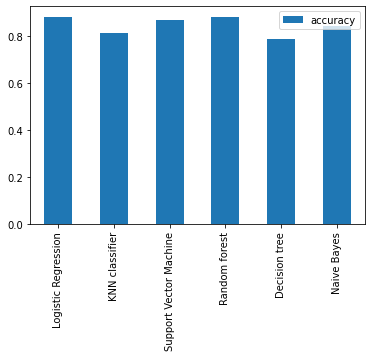

In [127]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

- Random Forest has a better accuracy than Logistic regression but Random Forest is an overfitted model hence we will select Logistic regression.

#### Features and their Contribution in Logistic Regression

In [128]:
feature_dict=dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

{'Age': -0.008831725324822147,
 'Attrition': -0.010615357376759428,
 'BusinessTravel': -7.007311405974565e-05,
 'DailyRate': 0.35268479690130067,
 'Department': 0.03220401975225366,
 'DistanceFromHome': 0.09429917117413875,
 'Education': -0.061222041440457266,
 'EducationField': 4.334509430437813e-05,
 'EmployeeNumber': -0.21455998449023353,
 'EnvironmentSatisfaction': -0.12398555501902545,
 'Gender': 0.004966063947732771,
 'HourlyRate': -0.23479920986104483,
 'JobInvolvement': -0.04913417916102195,
 'JobLevel': 0.02801054376098088,
 'JobRole': -0.22507591786053988,
 'JobSatisfaction': -0.29831372660137423,
 'MaritalStatus': -7.764735450195859e-05,
 'MonthlyIncome': 1.7322810608589768e-05,
 'MonthlyRate': 0.15992195899768963,
 'NumCompaniesWorked': 1.0073903402377626,
 'OverTime': -0.0003186986324576527,
 'PercentSalaryHike': 0.21755071331443418,
 'PerformanceRating': -0.06325343139919705,
 'RelationshipSatisfaction': -0.32620679008455505,
 'StockOptionLevel': -0.05400881385783164,
 'T

<AxesSubplot:title={'center':'Feature Importance'}>

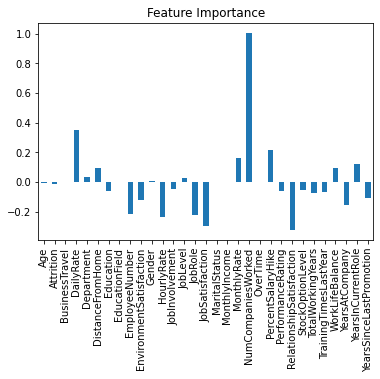

In [129]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")


- Number of companies worked is the biggest deciding factor

### Saving Model

In [136]:
save_model=pkl.dumps(lr)
lr_pkl=pkl.loads(save_model)
lr_pkl.predict(x_test)


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N